In [2]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
#Uploading datasets into the workspace
customeraddress=pd.read_excel('customeraddresses.xlsx')
transactions=pd.read_excel('transactionss.xlsx')
customerdemo=pd.read_excel('customerdemographic.xlsx')

C:\Users\user\AppData\Local\Temp\ipykernel_14556\2327956923.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerdemo=pd.read_excel('customerdemographic.xlsx')


<h2>Visual assessment

In [5]:
transactions.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4919,4920,30,581,2017-08-21,1.0,Approved,Solex,Standard,high,medium,748.17,448.90,34527.0
8081,8082,40,1161,2017-06-16,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0
15017,15018,55,1245,2017-02-02,1.0,Approved,Trek Bicycles,Road,medium,large,1894.19,598.76,37823.0
1340,1341,39,1533,2017-09-17,0.0,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,35560.0
18449,18450,42,1950,2017-08-09,1.0,Approved,OHM Cycles,Road,medium,small,1810.00,1610.90,40672.0


In [6]:
transactions.shape

(20000, 13)

In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [9]:
sum(transactions.duplicated())

0

In [11]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [12]:
customeraddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [13]:
customeraddress.shape

(3999, 6)

In [14]:
customeraddress.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [15]:
sum(customeraddress.duplicated())

0

In [16]:
customeraddress.isna().any()

customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool

In [17]:
customerdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [18]:
customerdemo.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [19]:
customerdemo['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

<h2>Quality issues</h2>

<b>Transactions dataset</b>

1.Some columns have recorded NULL values: online_order, brand, product_line, product_class_product_size, standard_cost and product_first_sold_date.
2.Irrelevant columns to my analysis: online_order, product_first_sold_date.

<b>Customeraddress dataset</b>

1.Some states are recorded as Victoria, Newsouthwales instead of VIC and NSW respectively.

<b>Customerdemographic dataset</b>

1.Irrelevant columns such as deceased_indicator and default.<br>
2.Some genders are recorded as F,Female,M, instead of Male or Female.<br>
3.Some genders are recorded as U.<br>
4.Missing values in columns last_name, DOB,job_title,job_industry_category.<br>

<h3>Data cleaning</h3>
1.Dropping rows with missing values.<br>
2.Dropping columns not relevant to my analysis.<br>
3.Replacing genders recorded as F, Femal and M as either Male or Female.<br>
4.Dropping genders recorded as U.<br>
5.Replacing recorded states as Victoria, Newsouthwales as VIC and NSW.<br>
6.Joining the three datasets into one clean dataset.<br>





<b>Dropping rows with missing values

In [20]:
transactions.dropna(inplace=True)

In [21]:
transactions.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

<b>Dropping columns not relevant to my analysis.

In [22]:
transactions.drop(['online_order','product_first_sold_date'],axis=1,inplace=True)

In [23]:
transactions.shape

(19445, 11)

<b>Replacing recorded states as Victoria, Newsouthwales as VIC and NSW.

In [24]:
customeraddress.loc[customeraddress['state']=='Victoria','state']='VIC'
customeraddress.loc[customeraddress['state']=='New South Wales','state']='NSW'



In [25]:
customerdemo.drop(['default','deceased_indicator'],axis=1,inplace=True)

<b>Replacing genders recorded as F, Femal and M as either Male or Female.

In [26]:
customerdemo['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [27]:
customerdemo.loc[customerdemo['gender']=='F','gender']='Female'
customerdemo.loc[customerdemo['gender']=='Femal','gender']='Female'
customerdemo.loc[customerdemo['gender']=='M','gender']='Male'



<b>Dropping genders recorded as U.

In [28]:
customerdemo.drop(index=customerdemo[customerdemo['gender'] == 'U'].index, inplace=True)

In [29]:
customerdemo.dropna(inplace=True)

<b>Joining the three datasets into one clean dataset.

In [30]:
df= pd.merge(transactions, customeraddress, on='customer_id')

newcustomerlist= pd.merge(df, customerdemo, on='customer_id')

newcustomerlist

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
1,11065,1,2950,2017-10-16,Approved,Giant Bicycles,Standard,medium,medium,1403.50,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
2,18923,62,2950,2017-04-26,Approved,Solex,Standard,medium,medium,478.16,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
3,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0
4,6862,4,3120,2017-10-05,Approved,Giant Bicycles,Standard,high,medium,1129.13,...,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13623,18165,86,3446,2017-12-03,Approved,OHM Cycles,Standard,medium,medium,235.63,...,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,No,14.0
13624,18735,45,3168,2017-02-21,Approved,Solex,Standard,medium,medium,441.49,...,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,No,22.0
13625,18789,83,3168,2017-04-11,Approved,Solex,Touring,medium,large,2083.94,...,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,No,22.0
13626,19113,3,3168,2017-06-03,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,No,22.0


In [31]:
newcustomerlist.to_csv('newcustomerlistkpmg.csv')


In [32]:
newcustomerlist.shape

(13628, 26)

In [33]:
newcustomerlist.isna().any()

transaction_id                         False
product_id                             False
customer_id                            False
transaction_date                       False
order_status                           False
brand                                  False
product_line                           False
product_class                          False
product_size                           False
list_price                             False
standard_cost                          False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
first_name                             False
last_name                              False
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_indust

<h2>Data Exploration

In [34]:
newcustomerlist.head()

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
1,11065,1,2950,2017-10-16,Approved,Giant Bicycles,Standard,medium,medium,1403.50,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
2,18923,62,2950,2017-04-26,Approved,Solex,Standard,medium,medium,478.16,...,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0
3,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0
4,6862,4,3120,2017-10-05,Approved,Giant Bicycles,Standard,high,medium,1129.13,...,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0


In [35]:
commocust=newcustomerlist['customer_id'].value_counts().head(10)
commocust

2183    14
2476    14
3326    13
3232    13
1302    13
2464    13
637     13
1913    13
2072    13
2914    12
Name: customer_id, dtype: int64

In [36]:
df=newcustomerlist.groupby('customer_id')


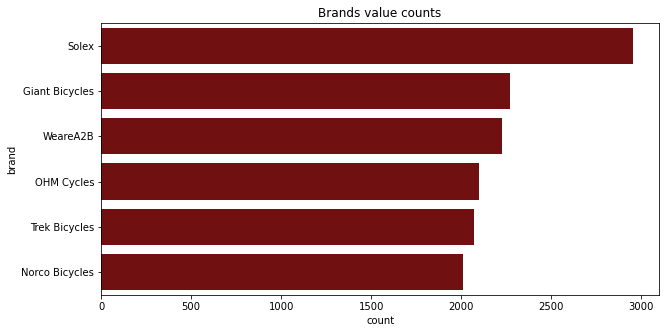

In [38]:
#To see which brand has the highest count

fig=plt.figure(figsize=(10,5))
sns.countplot(y="brand", data=newcustomerlist,color='Maroon',order=newcustomerlist["brand"].value_counts().index)
plt.title("Brands value counts")
plt.show()

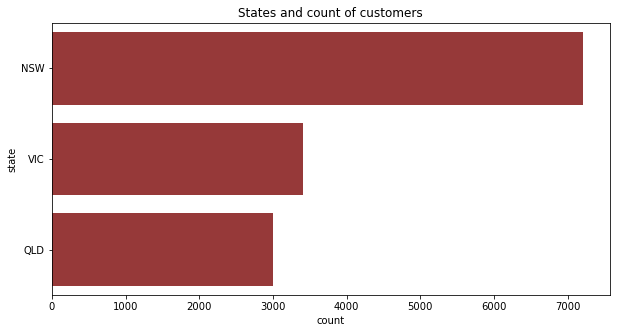

In [39]:
#To see which state has more customers

fig=plt.figure(figsize=(10,5))
sns.countplot(y="state", data=newcustomerlist,color='brown',order=newcustomerlist["state"].value_counts().index)
plt.title("States and count of customers")
plt.show()

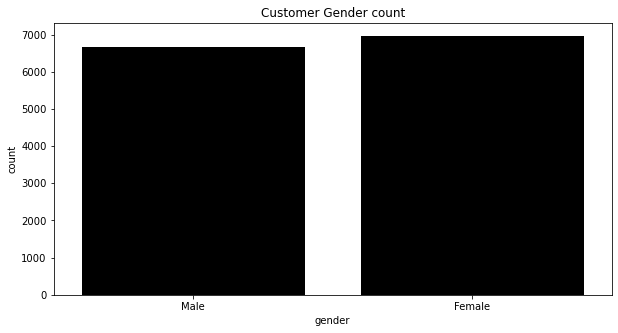

In [40]:
#To see which gender buys more

fig=plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=newcustomerlist,color='black')
plt.title("Customer Gender count")
plt.show()

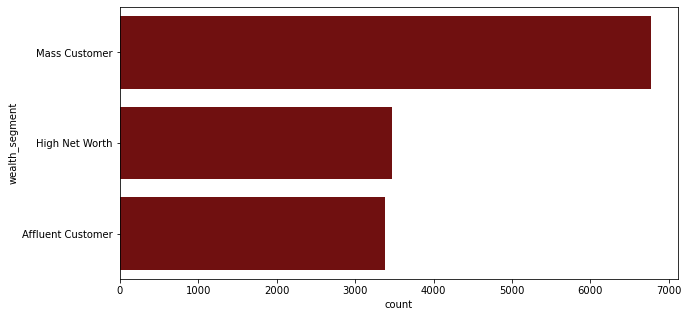

In [137]:
fig=plt.figure(figsize=(10,5))
sns.countplot(y="wealth_segment", data=newcustomerlist,color='Maroon',order=newcustomerlist["wealth_segment"].value_counts().index)
plt.show()

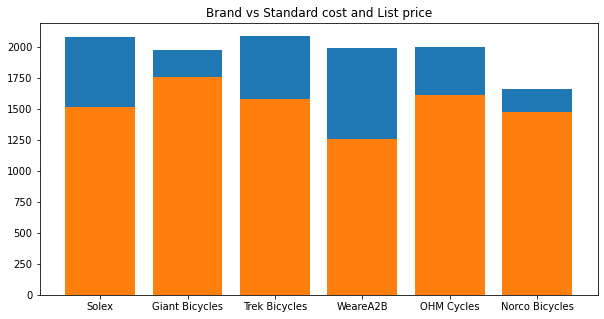

In [41]:

fig=plt.figure(figsize=(10,5))
plt.bar(newcustomerlist['brand'],newcustomerlist['list_price'], label='Measure 1')
plt.bar(newcustomerlist['brand'], newcustomerlist['standard_cost'], label='Measure 2')
plt.title('Brand vs Standard cost and List price')
plt.show()

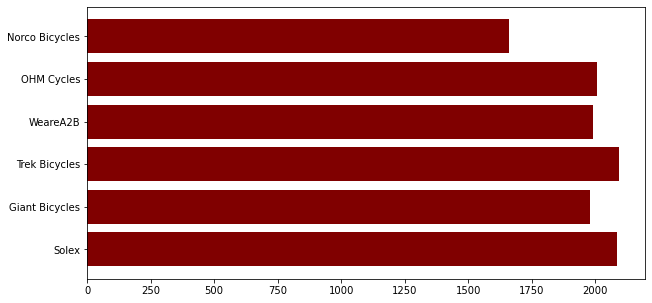

In [42]:
fig=plt.figure(figsize=(10,5))
plt.barh(newcustomerlist.brand,newcustomerlist.list_price,color='maroon')
plt.show()